In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('data/810_841.txt', sep='\t')
df.head(3)

,RUN,Event,Teta,Fi,Nview,NviewCorr,Sdet,Dens,DensCorr,NgoodPMT,NhitPMT,SumNpeGoodCorr,SpecEnDep,NupSCT,NdnSCT
0,810,3336,47.73,197.82,5,5.00226,28.9743,0.100167,0.102477,520,296,4124.71,40250.3,1,1
1,810,14441,43.43,148.71,5,5.00226,26.9756,0.107589,0.110070,520,286,3753.22,34098.6,2,0
2,810,20146,41.20,212.96,5,5.00226,25.6804,0.113015,0.115621,520,307,5342.78,46209.5,2,0


In [5]:
events_df = pd.read_csv('../data/run_events.csv')
events_df.head(3)

,NRUN,NEvent,Theta,Phi,event_time_ns,clusters_bit,clusters,1_1_t,1_2_t,1_3_t,...,8_theta,8_phi,8_a_x,8_a_y,8_a_z,9_theta,9_phi,9_a_x,9_a_y,9_a_z
0,836,6627,63.67,116.71,41539852841490,254,"7,2,5,3,4,8,6",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,836,12188,42.90,198.78,41927414340004,348,"9,3,7,4,5",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.897595,190.808834,-0.916387,-0.174957,0.360036
2,836,12453,51.32,212.71,41946132622518,151,"1,3,2,8,5",2376.449,2347.995,2335.962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
theta_list = np.array(df['Teta'])
phi_list = np.array(df['Fi'])

In [7]:
len(theta_list)

6990

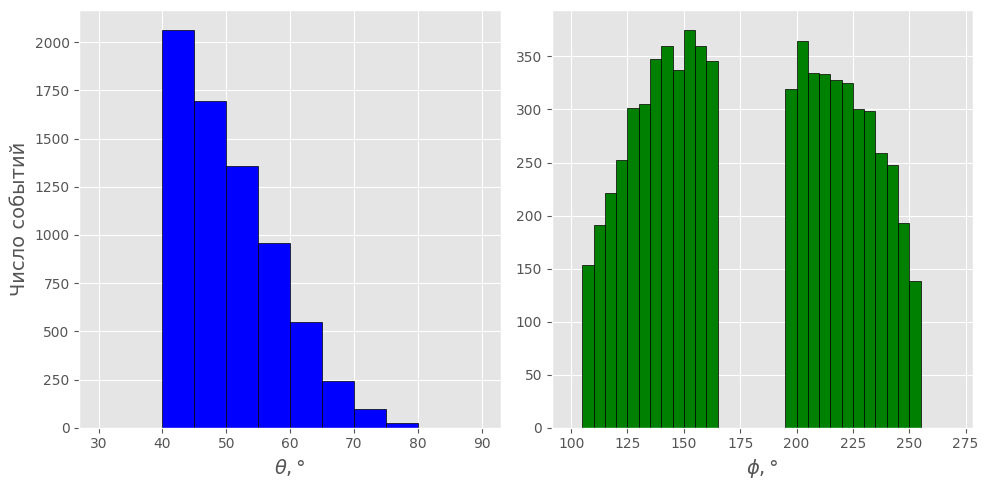

In [8]:
bin_edges_theta = np.arange(30, 90 + 1, 5)
bin_edges_phi = np.arange(100, 270 + 1, 5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(theta_list, bins=bin_edges_theta, color='blue', edgecolor='black')
plt.xlabel(r'$\theta,\degree$', fontsize=14)
plt.ylabel('Число событий', fontsize=14)

plt.subplot(1, 2, 2)
plt.hist(phi_list, bins=bin_edges_phi, color='green', edgecolor='black')
plt.xlabel(r'$\phi,\degree$', fontsize=14)

plt.tight_layout()
plt.savefig('plots/theta_phi.png')
plt.show()

In [9]:
df = df[~df['RUN'].isin([810, 811, 812])]
df.head(3)

,RUN,Event,Teta,Fi,Nview,NviewCorr,Sdet,Dens,DensCorr,NgoodPMT,NhitPMT,SumNpeGoodCorr,SpecEnDep,NupSCT,NdnSCT
607,813,3685,61.09,159.39,5,5.00226,34.9723,0.082988,0.084901,519,285,4393.51,51748.4,0,0
608,813,8468,54.29,233.61,8,8.00926,28.5792,0.206768,0.208603,519,343,9295.42,44560.4,1,0
609,813,34795,65.17,213.99,6,6.00391,36.1961,0.107854,0.109815,519,394,8778.06,79935.1,0,2


In [10]:
events_df = events_df[~events_df['NRUN'].isin([810, 811, 812])]
events_df.head(3)

,NRUN,NEvent,Theta,Phi,event_time_ns,clusters_bit,clusters,1_1_t,1_2_t,1_3_t,...,8_theta,8_phi,8_a_x,8_a_y,8_a_z,9_theta,9_phi,9_a_x,9_a_y,9_a_z
0,836,6627,63.67,116.71,41539852841490,254,"7,2,5,3,4,8,6",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,836,12188,42.90,198.78,41927414340004,348,"9,3,7,4,5",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.897595,190.808834,-0.916387,-0.174957,0.360036
2,836,12453,51.32,212.71,41946132622518,151,"1,3,2,8,5",2376.449,2347.995,2335.962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
events_df = events_df.drop_duplicates()

In [12]:
print(f'число событий с группами мюонов: {
      len(df)},\n совместных событий: {len(events_df)}')

число событий с группами мюонов: 6383,
 совместных событий: 5215


In [13]:
events = df[df['Event'].isin(events_df['NEvent'])]
not_events = df[~df['Event'].isin(events_df['NEvent'])]

In [14]:
print(f'число событий с группами мюонов: {
      len(events) + len(not_events)},\n совместных событий: {len(events)}')

число событий с группами мюонов: 6383,
 совместных событий: 5210


In [15]:
events.head(3)

,RUN,Event,Teta,Fi,Nview,NviewCorr,Sdet,Dens,DensCorr,NgoodPMT,NhitPMT,SumNpeGoodCorr,SpecEnDep,NupSCT,NdnSCT
607,813,3685,61.09,159.39,5,5.00226,34.9723,0.082988,0.084901,519,285,4393.51,51748.4,0,0
608,813,8468,54.29,233.61,8,8.00926,28.5792,0.206768,0.208603,519,343,9295.42,44560.4,1,0
609,813,34795,65.17,213.99,6,6.00391,36.1961,0.107854,0.109815,519,394,8778.06,79935.1,0,2


In [18]:
not_events.head(3)

,RUN,Event,Teta,Fi,Nview,NviewCorr,Sdet,Dens,DensCorr,NgoodPMT,NhitPMT,SumNpeGoodCorr,SpecEnDep,NupSCT,NdnSCT
621,813,99994,60.40,236.32,5,5.00226,29.9758,0.096820,0.099053,519,397,9292.33,93811.9,1,0
622,813,111545,40.79,109.64,6,6.00391,17.8245,0.219019,0.223000,519,448,14446.70,64783.6,9,0
624,813,125146,63.16,148.74,7,7.00621,35.7312,0.137309,0.139155,519,347,5955.55,42797.8,0,0


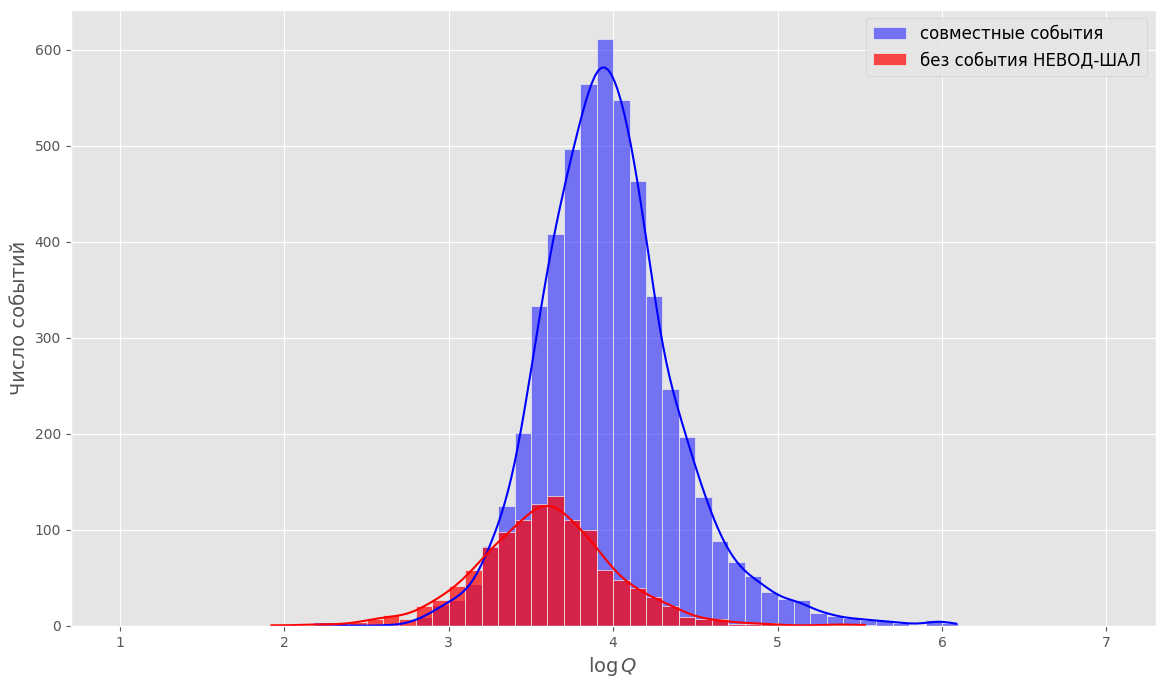

In [19]:
log_events = np.log10(events['SumNpeGoodCorr'])
log_not_events = np.log10(not_events['SumNpeGoodCorr'])
theta_events = (events['Teta']).to_numpy()
theta_not_events = not_events['Teta'].to_numpy()

min_bin = min(log_events.min(), log_not_events.min())
max_bin = max(log_events.max(), log_not_events.max())
bins = np.arange(np.floor(min_bin), np.ceil(
    max_bin) + 0.1, 0.1)

plt.figure(figsize=(14, 8))

sns.histplot(log_events, bins=bins, kde=True,
             color='blue', label='совместные события')
sns.histplot(log_not_events, bins=bins, kde=True,
             color='red', label='без события НЕВОД-ШАЛ', alpha=0.7)

plt.xlabel(r'$\log{Q}$', fontsize=14)
plt.ylabel('Число событий', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.savefig('plots/events_logQ.png')
plt.show()

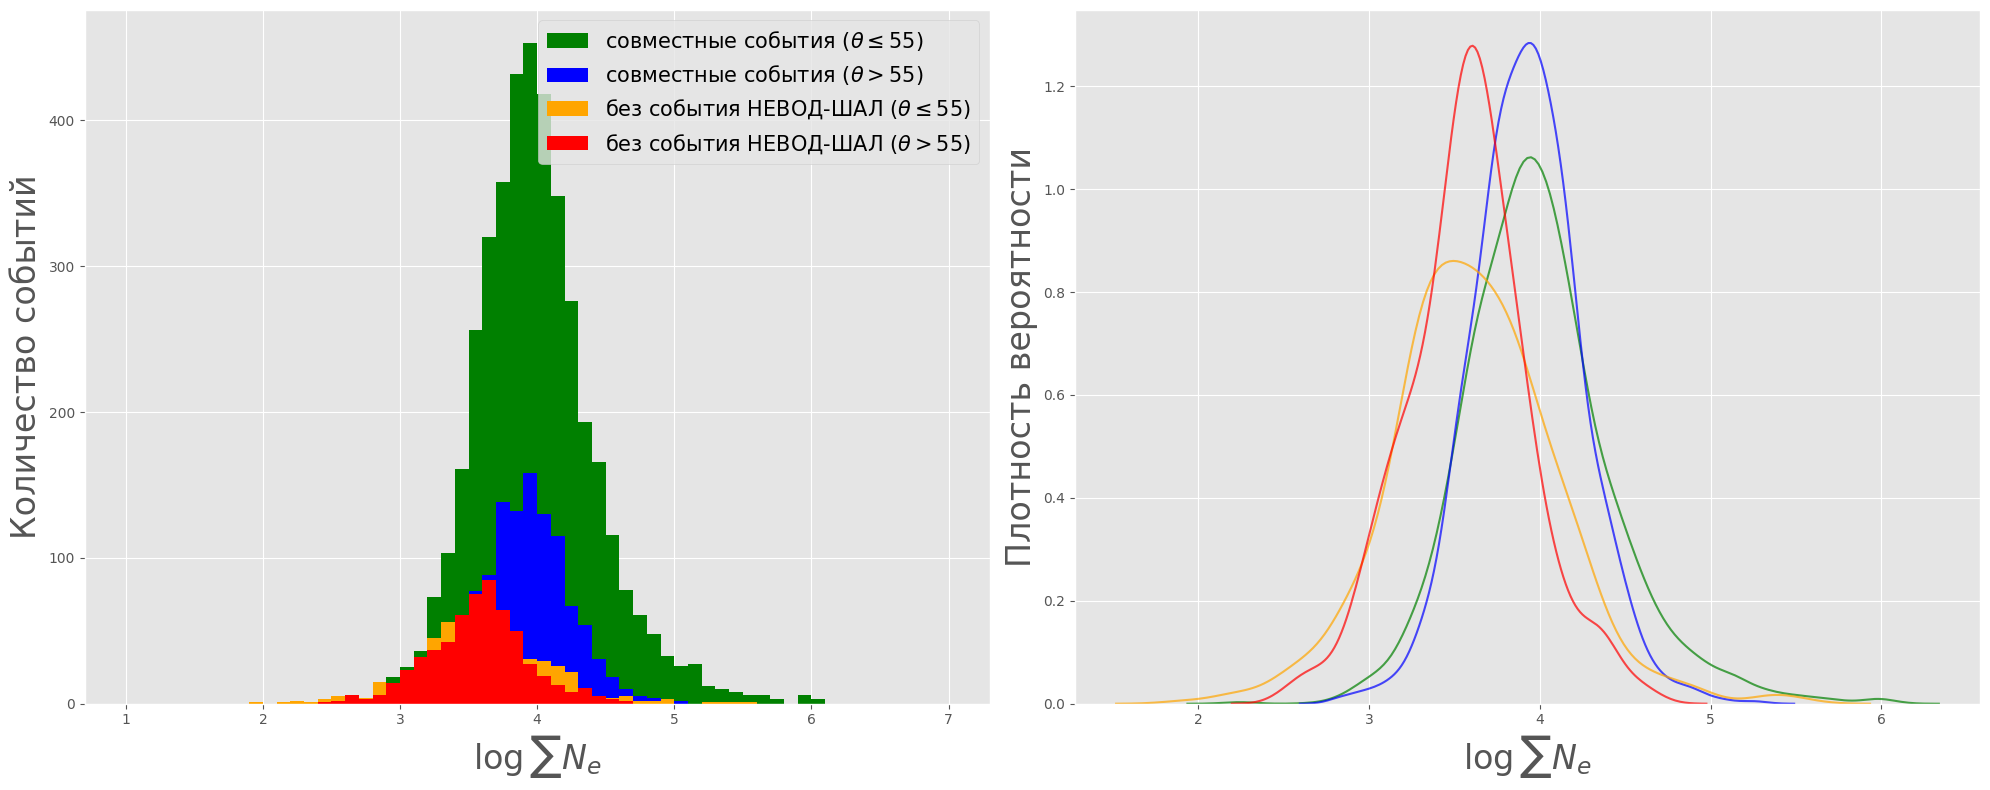

In [99]:
log_events = np.log10(events['SumNpeGoodCorr'])
log_not_events = np.log10(not_events['SumNpeGoodCorr'])
theta_events = events['Teta'].to_numpy()
theta_not_events = not_events['Teta'].to_numpy()

min_bin = min(log_events.min(), log_not_events.min())
max_bin = max(log_events.max(), log_not_events.max())
bins = np.arange(np.floor(min_bin), np.ceil(max_bin) + 0.1, 0.1)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].hist(log_events[(theta_events <= 55)], bins=bins,
            color='green', alpha=1, label=r'совместные события ($\theta \leq 55$)')
axs[0].hist(log_events[(theta_events > 55)], bins=bins,
            color='blue', alpha=1, label=r'совместные события ($\theta > 55$)')
axs[0].hist(log_not_events[(theta_not_events <= 55)], bins=bins,
            color='orange', alpha=1, label=r'без события НЕВОД-ШАЛ ($\theta \leq 55$)')
axs[0].hist(log_not_events[(theta_not_events > 55)], bins=bins,
            color='red', alpha=1, label=r'без события НЕВОД-ШАЛ ($\theta > 55$)')
axs[0].set_xlabel(r'$\log{\sum N_e}$', fontsize=24)
axs[0].set_ylabel('Количество событий', fontsize=24)
axs[0].legend(fontsize=15)
axs[0].grid(True)

sns.kdeplot(log_events[(theta_events <= 55)], color='green', ax=axs[1],
            label=r'совместные события ($\theta \leq 55$)', fill=False, common_norm=True, alpha=0.7)
sns.kdeplot(log_events[(theta_events > 55)], color='blue', ax=axs[1],
            label=r'совместные события ($\theta > 55$)', fill=False, common_norm=True, alpha=0.7)
sns.kdeplot(log_not_events[(theta_not_events <= 55)], color='orange', ax=axs[1],
            label=r'без события НЕВОД-ШАЛ ($\theta \leq 55$)', fill=False, common_norm=True, alpha=0.7)
sns.kdeplot(log_not_events[(theta_not_events > 55)], color='red', ax=axs[1],
            label=r'без события НЕВОД-ШАЛ ($\theta > 55$)', fill=False, common_norm=True, alpha=0.7)
axs[1].set_xlabel(r'$\log{\sum N_e}$', fontsize=24)
axs[1].set_ylabel('Плотность вероятности', fontsize=24)
axs[1].grid(True)

plt.tight_layout()
plt.savefig('plots/logQ_theta55.png')
plt.show()

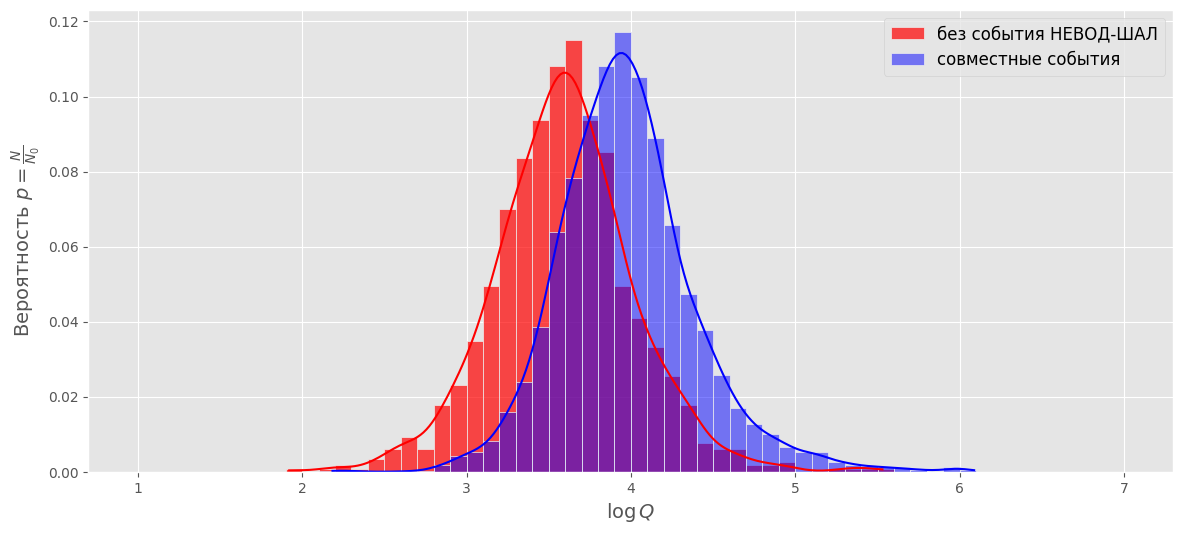

In [85]:
log_events = np.log10(events['SumNpeGoodCorr'])
log_not_events = np.log10(not_events['SumNpeGoodCorr'])

min_bin = min(log_events.min(), log_not_events.min())
max_bin = max(log_events.max(), log_not_events.max())
bins = np.arange(np.floor(min_bin), np.ceil(
    max_bin) + 0.1, 0.1)


plt.figure(figsize=(14, 6))
sns.histplot(log_not_events, bins=bins, kde=True, stat='probability',
             color='red', label='без события НЕВОД-ШАЛ', alpha=0.7)
sns.histplot(log_events, bins=bins, kde=True, stat='probability',
             color='blue', label='совместные события')


plt.xlabel(r'$\log{Q}$', fontsize=14)
plt.ylabel(r'Вероятность $p=\frac{N}{N_{0}}$', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('plots/probability_logQ.png')
plt.show()

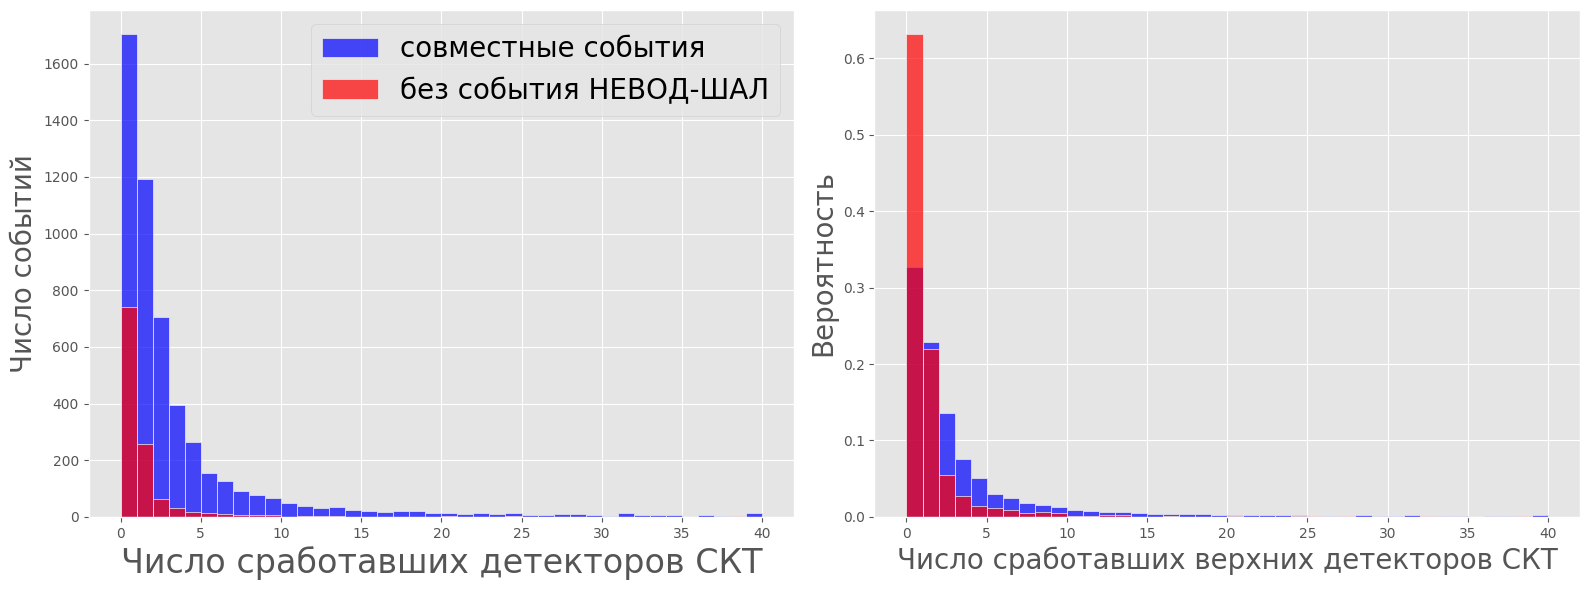

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

events_nup = events['NupSCT']
not_events_nup = not_events['NupSCT']

# Определяем границы бинов для NupSCT
min_bin_nup = min(events_nup.min(), not_events_nup.min())
max_bin_nup = max(events_nup.max(), not_events_nup.max())
bins_nup = np.arange(np.floor(min_bin_nup), np.ceil(
    max_bin_nup) + 1, 1)  # Бины с шагом 1

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(events_nup, bins=bins_nup, stat='count', color='blue',
             label='совместные события', alpha=0.7, ax=axes[0])
sns.histplot(not_events_nup, bins=bins_nup, stat='count', color='red',
             label='без события НЕВОД-ШАЛ', alpha=0.7, ax=axes[0])

axes[0].set_xlabel('Число сработавших детекторов СКТ', fontsize=24)
axes[0].set_ylabel('Число событий', fontsize=20)
axes[0].legend(fontsize=20)
axes[0].grid(True)

sns.histplot(events_nup, bins=bins_nup, stat='probability',
             color='blue', label='совместные события', alpha=0.7, ax=axes[1])
sns.histplot(not_events_nup, bins=bins_nup, stat='probability',
             color='red', label='без события НЕВОД-ШАЛ', alpha=0.7, ax=axes[1])

axes[1].set_xlabel('Число сработавших верхних детекторов СКТ', fontsize=20)
axes[1].set_ylabel('Вероятность', fontsize=20)
axes[1].grid(True)

plt.tight_layout()
plt.savefig('plots/SKT.png')
plt.show()